# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list also record lat and lng
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

658

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
#lat_lngs = zip(cities_lat, cities_lng)
#city = ""
cities_lat = []
cities_lng = []
cities_temp = []
cities_hum = []
cities_cld = []
cities_wnd = []

index = 1
print("""
Beginning Data Retrieval     
-----------------------------
""")
for city in cities[:]:
    # Build query URL
    query_url = url+"appid="+api_key + "&q="+city
    weather_json = requests.get(query_url+'&units=imperial').json()
    # Check if city is found in weather api DB
    if(weather_json['cod'] != 200):
        print("Skipping city not found in weather map API...")
        cities.remove(city)
    else:
        print(f"Processing Record {index} of Set {(index//50)+1} | {city}")
        # append data to list to be created into DF
        cities_lat.append(weather_json['coord']['lat'])
        cities_lng.append(weather_json['coord']['lon'])
        cities_temp.append(weather_json['main']['temp'])
        cities_hum.append(weather_json['main']['humidity'])
        cities_cld.append(weather_json['clouds']['all'])
        cities_wnd.append(weather_json['wind']['speed'])
        index += 1
    #if(index > 11):
    #    break


Beginning Data Retrieval     
-----------------------------

Skipping city not found in weather map API...
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | gerash
Processing Record 3 of Set 1 | kavaratti
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | sabha
Processing Record 6 of Set 1 | koratla
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | auki
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | ancud
Processing Record 12 of Set 1 | tasiilaq
Skipping city not found in weather map API...
Skipping city not found in weather map API...
Processing Record 13 of Set 1 | beloha
Skipping city not found in weather map API...
Processing Record 14 of Set 1 | te anau
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | yulara
Processing Record 19 of Set 1 | saint-philip

Processing Record 180 of Set 4 | havre-saint-pierre
Processing Record 181 of Set 4 | whitehorse
Processing Record 182 of Set 4 | ambanja
Processing Record 183 of Set 4 | adrar
Skipping city not found in weather map API...
Processing Record 184 of Set 4 | leningradskiy
Skipping city not found in weather map API...
Processing Record 185 of Set 4 | puerto quijarro
Processing Record 186 of Set 4 | mandalgovi
Processing Record 187 of Set 4 | sinnamary
Processing Record 188 of Set 4 | morro bay
Processing Record 189 of Set 4 | samarai
Processing Record 190 of Set 4 | kailua
Processing Record 191 of Set 4 | inta
Skipping city not found in weather map API...
Processing Record 192 of Set 4 | georgetown
Processing Record 193 of Set 4 | damietta
Processing Record 194 of Set 4 | coahuayana
Processing Record 195 of Set 4 | port-gentil
Processing Record 196 of Set 4 | curuca
Processing Record 197 of Set 4 | erdenet
Processing Record 198 of Set 4 | alice springs
Processing Record 199 of Set 4 | lyuba

Processing Record 349 of Set 7 | morehead
Processing Record 350 of Set 8 | teguldet
Processing Record 351 of Set 8 | hithadhoo
Processing Record 352 of Set 8 | yarim
Processing Record 353 of Set 8 | praia da vitoria
Processing Record 354 of Set 8 | abu kamal
Processing Record 355 of Set 8 | lima
Processing Record 356 of Set 8 | pekalongan
Processing Record 357 of Set 8 | geraldton
Processing Record 358 of Set 8 | mtambile
Processing Record 359 of Set 8 | talnakh
Processing Record 360 of Set 8 | sao filipe
Processing Record 361 of Set 8 | palafrugell
Processing Record 362 of Set 8 | harlingen
Processing Record 363 of Set 8 | okhotsk
Processing Record 364 of Set 8 | fairbanks
Processing Record 365 of Set 8 | carutapera
Processing Record 366 of Set 8 | dolores
Processing Record 367 of Set 8 | yoichi
Processing Record 368 of Set 8 | pucallpa
Processing Record 369 of Set 8 | abilene
Processing Record 370 of Set 8 | buala
Skipping city not found in weather map API...
Processing Record 371 of

Processing Record 526 of Set 11 | liwale
Processing Record 527 of Set 11 | kortkeros
Skipping city not found in weather map API...
Processing Record 528 of Set 11 | kunigal
Processing Record 529 of Set 11 | ranfurly
Processing Record 530 of Set 11 | klyuchi
Processing Record 531 of Set 11 | mecca
Processing Record 532 of Set 11 | kuusamo
Processing Record 533 of Set 11 | rawlins
Processing Record 534 of Set 11 | sungaipenuh
Processing Record 535 of Set 11 | tazovskiy
Processing Record 536 of Set 11 | tucupita
Processing Record 537 of Set 11 | chernyshevskiy
Processing Record 538 of Set 11 | virginia beach
Processing Record 539 of Set 11 | narsaq
Processing Record 540 of Set 11 | tulum
Processing Record 541 of Set 11 | maceio
Processing Record 542 of Set 11 | puerto carreno
Processing Record 543 of Set 11 | zhiryatino
Processing Record 544 of Set 11 | adwa
Processing Record 545 of Set 11 | solnechnyy
Processing Record 546 of Set 11 | broken hill
Skipping city not found in weather map AP

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
cities_data_df = pd.DataFrame({"City_Name" : cities,
                               "Lattitude" : cities_lat,
                               "Longitude": cities_lng,
                               "Temperature(F)" : cities_temp,
                               "Humidity": cities_hum,
                               "Cloudiness": cities_cld,
                               "Windiness(mph)": cities_wnd})
cities_data_df['City_Name'] = cities_data_df['City_Name'].str.title()
cities_data_df.to_csv(output_data_file, index=False)
cities_data_df.head()
#cities_data_df.dtypes

City_Name          object
Lattitude         float64
Longitude         float64
Temperature(F)    float64
Humidity            int64
Cloudiness          int64
Windiness(mph)    float64
dtype: object

In [34]:
#function to setup color for legend
def tempColor(temp):
    if(temp >= 80):
        return '#8B0000'
    elif(temp >= 50):
        return '#FFD700'
    else:
        return '#87CEEB'
timestamp = time.strftime("%m-%d-%y")
timestamp

'09-02-18'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

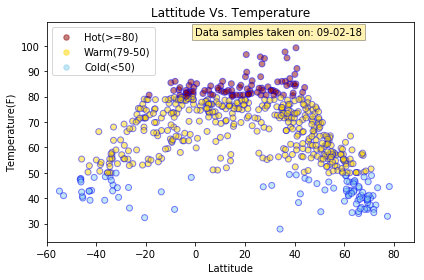

In [66]:
fig, ax = plt.subplots()
x_axis = cities_data_df['Lattitude']
y_axis = cities_data_df['Temperature(F)']

colors = [tempColor(temp) for temp in cities_data_df['Temperature(F)']]
plt.scatter(x_axis, y_axis, c=colors, edgecolors='b', alpha=0.5, label="__no_legend__")

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel("Temperature(F)")
plt.title("Lattitude Vs. Temperature")

temp_scale = [80,50,40]
label=['Hot(>=80)', 'Warm(79-50)', 'Cold(<50)']
# Create a legend
plt.scatter([], [], c=tempColor(temp_scale[0]), alpha=0.5, s=30,
                label=label[0])
plt.scatter([], [], c=tempColor(temp_scale[1]), alpha=0.5, s=30,
                label=label[1])
plt.scatter([], [], c=tempColor(temp_scale[2]), alpha=0.5, s=30,
                label=label[2])
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Temp Scale')
plt.legend(loc='upper left')

ax.text(0, y_axis.max()+5, f"Data samples taken on: {timestamp}", style='normal', color='#000000',
        bbox={'facecolor':'#FFD700', 'alpha':0.3, 'pad':3})

plt.ylim(y_axis.min()-5,y_axis.max()+10)
plt.xlim(x_axis.min()-5,x_axis.max()+10)
plt.tight_layout()
# Save Figure
plt.savefig('output_data/lat_vs_temp.png')

#### Latitude vs. Humidity Plot

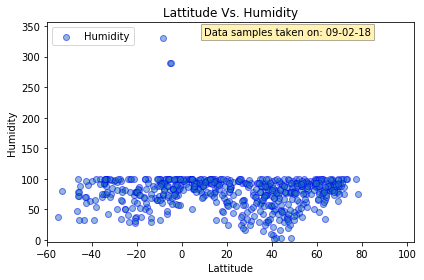

In [67]:
fig, ax = plt.subplots()
x_axis = cities_data_df['Lattitude']
y_axis = cities_data_df['Humidity']
plt.scatter(x_axis, y_axis, edgecolors='b', alpha=0.5)
plt.legend(loc="upper left")
plt.xlabel("Lattitude")
plt.ylabel("Humidity")
plt.title("Lattitude Vs. Humidity")
ax.text(10, y_axis.max()+4, f"Data samples taken on: {timestamp}", style='normal', color='#000000',
        bbox={'facecolor':'#FFD700', 'alpha':0.3, 'pad':3})
plt.ylim(y_axis.min()-5,y_axis.max()+25)
plt.xlim(x_axis.min()-5,x_axis.max()+25)
plt.tight_layout()
# Save Figure
plt.savefig('output_data/lat_vs_hum.png')

#### Latitude vs. Cloudiness Plot

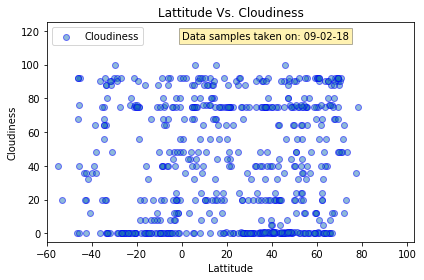

In [68]:
fig, ax = plt.subplots()
x_axis = cities_data_df['Lattitude']
y_axis = cities_data_df['Cloudiness']
plt.scatter(x_axis, y_axis, edgecolors='b', alpha=0.5)
plt.legend(loc="upper left")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
plt.title("Lattitude Vs. Cloudiness")
ax.text(0, y_axis.max()+15, f"Data samples taken on: {timestamp}", style='normal', color='#000000',
        bbox={'facecolor':'#FFD700', 'alpha':0.3, 'pad':3})
plt.ylim(y_axis.min()-5,y_axis.max()+25)
plt.xlim(x_axis.min()-5,x_axis.max()+25)
plt.tight_layout()
# Save Figure
plt.savefig('output_data/lat_vs_cld.png')

#### Latitude vs. Wind Speed Plot

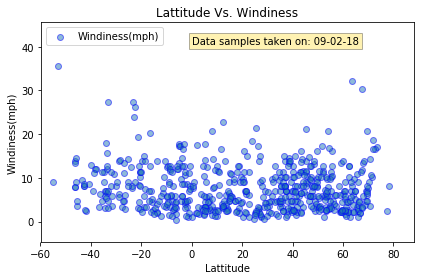

In [69]:
fig, ax = plt.subplots()
x_axis = cities_data_df['Lattitude']
y_axis = cities_data_df['Windiness(mph)']
plt.scatter(x_axis, y_axis, edgecolors='b', alpha=0.5)
plt.legend(loc="upper left")
plt.xlabel("Lattitude")
plt.ylabel("Windiness(mph)")
plt.title("Lattitude Vs. Windiness")
ax.text(0, y_axis.max()+5, f"Data samples taken on: {timestamp}", style='normal', color='#000000',
        bbox={'facecolor':'#FFD700', 'alpha':0.3, 'pad':3})
plt.ylim(y_axis.min()-5,y_axis.max()+10)
plt.xlim(x_axis.min()-5,x_axis.max()+10)
plt.tight_layout()
# Save Figure
plt.savefig('output_data/lat_vs_wnd.png')